# Homework 6: More Linear Regression

**Due**: Tuesday May 16th

### HW Logistics

- **Release**: Every week there will be a HW assignment released on *Wednesday* and due the following *Tuesday at 11:59pm*. 
Homework will be posted to the course website. 
- **Format**: We expect students to complete the homework notebooks using Google Colab (see Discussion 1), but this is not explicitly required and you may use whatever software you would like to run notebooks. 
- **Answers**: As a general guiding policy, you should always try to make it as clear as possible what your answer to each question is, and how you arrived at your answer. Generally speaking, this will mean including all code used to generate results, outputting the actual results to the notebook, and (when necessary) including written answers to support your code.
- **Submission**: Homeworks will be *submitted to Gradescope*, and we expect all students to do question matching on Gradescope upon submission.
- **Late Policy**: All students are allowed 7 total slip days for the quarter, and at most 5 can be used for a single HW assignment. There will be no late credit if you have used up all your slip days. Also, your lowest HW grade will be dropped.

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
sns.set_style()

## Question 1: Multiple Linear Regression

Let's return to the used cars dataset from HW5.

In [3]:
cars_df = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125/homework/main/data/used_cars.csv")

**Part (a)**: Fit a linear regression model which predicts price from both mileage and the year of a Honda Accord. Print out the summary of this model, write out the estimated regression equation, and interpret the estimated coefficient for mileage.

In [7]:
accord_df = cars_df[cars_df["model"] == "Accord"]

X = sm.add_constant(accord_df[["mileage", "year"]])
y = accord_df["price"]
lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     309.3
Date:                Tue, 09 May 2023   Prob (F-statistic):           7.29e-48
Time:                        10:54:55   Log-Likelihood:                -1094.5
No. Observations:                 122   AIC:                             2195.
Df Residuals:                     119   BIC:                             2204.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.424e+06   1.73e+05     -8.232      0.0

The regression equation is 

<center>
Predicted Price = -1,424,000 - 0.0396 mileage + 717.2773 year.
</center>

$\hat{\beta}_{mileage} = -0.0396$ means that for every additional mile an Accord is driven, we estimate that the price will decrease by about 4 cents, for accords of the same year.

**Part (b)**: Now fit a linear model predicting price just from mileage (as in HW5). Compare the estimated coefficient for mileage in this model compared to the model from part (a). Is there a noticeable difference in the estimated coefficient values? If so, why might this be the case?

In [6]:
X = sm.add_constant(accord_df[["mileage"]])
y = accord_df["price"]
lm2 = sm.OLS(y, X).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 09 May 2023   Prob (F-statistic):           2.58e-37
Time:                        10:54:53   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.068e+04    399.474     51.757      0.0

The coefficient for mileage in this model is about -0.04, whereas the coefficient in the previous model was around -0.09, which is noticeably smaller. This is because after controlling for year, additional mileage on a Honda Accord does not diminish value as much. One explanation for this is that when not controlling for year, an Accord with additional mileage also likely is an older model year, which makes the effect of additional mileage more severe in the model.

**Part (c)** Use your models from part (a) and (b) to make two predictions for the value of a 2012 Accord with 50,000 miles. Compare these predictions, explaining why they are significantly different or why they are close to the same.

In [8]:
pred_without_year = lm2.predict(np.array([[1, 50000]]))[0]
print(f"Predicted price without year: ${np.round(pred_without_year, 2)}")

pred_with_year = lm.predict(np.array([[1, 50000, 2012]]))[0]
print(f"Predicted price with year: ${np.round(pred_with_year, 2)}")

Predicted price without year: $16285.2
Predicted price with year: $17523.05


The model which uses year predicts a significantly larger price. This is expected, because the mean year for an Accord in this data set is about 2008, whereas we are predicting for a model 2012 Accord. Thus, accounting for year should increase the prediction because price and year are positively correlated and 2012 is larger than the mean year from the data set.

## Question 2: Categorical Variables

Another feature that can impact the price of a car is the "trim" of the car. That is, for a given car model, e.g. a Honda Accord, there are often several different variations or trims of the same car model that have different features.

**Part (a)**: Make a plot to visualize the relationship between trim and price in the Accord data. Does it look like trim has a significant effect on price?

<AxesSubplot:xlabel='trim', ylabel='price'>

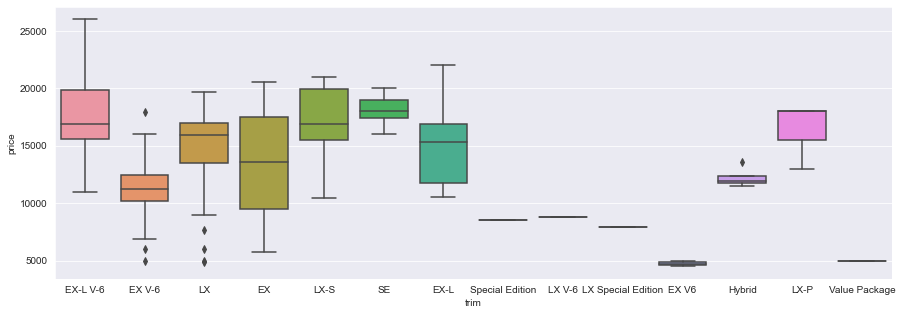

In [3]:
cars_df = pd.read_csv("data/used_cars.csv")
accord_df = cars_df[cars_df["model"] == "Accord"]

# Some options are strip plot, box plot, violin plot
plt.figure(figsize=(15, 5))
sns.boxplot(data=accord_df, x="trim", y="price")

**Part (b)** Fit a linear model which predicts Accord price from mileage, year, and trim. Interpret the coefficient for the "LX" trim. Which trims have significant coefficients, and is this surprising?

In [10]:
lm3 = smf.ols(formula="price ~ mileage + year + trim", data=accord_df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     79.25
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.93e-50
Time:                        12:25:49   Log-Likelihood:                -1053.2
No. Observations:                 122   AIC:                             2138.
Df Residuals:                     106   BIC:                             2183.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1.566e+06   1.56e+05    -10.064      0.000   -1.87e+06   -1.26e+06
trim[T.EX V-6]              1411.5605    528.563      2.671      0.009     363.633    2459.488
trim[T.EX V6]                 -3.0493   1020.812     -0.003      0.998   -2026.907    2020.809
trim[T.EX-L]                1397.4306    624.776      2.237      0.027     158.751    2636.110
trim[T.EX-L V-6]            2455.8995    500.578      4.906      0.000    1463.455    3448.344
trim[T.Hybrid]              2204.4900    825.966      2.669      0.009     566.931    3842.049
trim[T.LX]                 -1277.7089    452.562     -2.823      0.006   -2174.958    -380.460
trim[T.LX Special Edition]  -723.3480   1512.071     -0.478      0.633   -3721.175    2274.479
trim[T.LX V-6]             -1010.0084   1509.472     -0.669      0.505   -4002.683    1982.667
trim[T.LX-P]                -659.3543    923.379     -0.714      0.477   -2490.042    1171.333
trim[T.LX-S]                -611.3303    677.616     -0.902      0.369   -1954.770     732.109
trim[T.SE]                   408.7942    563.452      0.726      0.470    -708.304    1525.893
trim[T.Special Edition]    -1751.4813   1516.344     -1.155      0.251   -4757.781    1254.818
trim[T.Value Package]      -2202.5195   1545.618     -1.425      0.157   -5266.858     861.819
mileage                       -0.0379      0.006     -6.858      0.000      -0.049      -0.027
year                         787.6573     77.285     10.192      0.000     634.431     940.883
==============================================================================
Omnibus:                        6.480   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.823
Skew:                           0.374   Prob(JB):                       0.0330
Kurtosis:                       3.884   Cond. No.                     1.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The dropped level for trim was "EX" (since it was first alphabetically). Thus, the coefficient for "LX", which has value -1277.71, means that the estimated average price for an LX accord is about $1277.71 *less* than the estimated average price for an EX accord, keeping mileage and year constant. This makes sense, because the LX trim is typically the entry-level trim for Accords.

Further, the trims with signficiant coefficients are EX V-6, EX-L, EX-L V-6, Hybrid, and LX. Looking back at the plot from (a), it seems that many of the trims without siginficant coefficients are that way because there is very little data for the trim.

**Part (c)** You hypothesize that some Accord trims degrade in value faster than others as more miles are put on the car. Fit a new linear model that adds new term(s) to your model from part (b) to address this hypothesis. Print out a summary of this model fit. Does your hypothesis appear to be true? (Hint: you might find it helpful to refer to Discussion 6 :) ). 

In [107]:
lm = smf.ols("price ~ year + mileage * trim", data=accord_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     70.61
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           6.42e-51
Time:                        09:25:15   Log-Likelihood:                -1027.9
No. Observations:                 122   AIC:                             2106.
Df Residuals:                      97   BIC:                             2176.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -1.707e+06   1.42e+05    -12.030      0.000   -1.99e+06   -1.43e+06
trim[T.EX V-6]                       -30.9096    979.633     -0.032      0.975   -1975.210    1913.391
trim[T.EX V6]                      -4610.1068   3871.437     -1.191      0.237   -1.23e+04    3073.623
trim[T.EX-L]                        4968.7989   1357.159      3.661      0.000    2275.214    7662.384
trim[T.EX-L V-6]                    4818.1356    846.294      5.693      0.000    3138.477    6497.795
trim[T.Hybrid]                     -1064.7753   4006.212     -0.266      0.791   -9015.998    6886.447
trim[T.LX]                         -1722.2316    711.998     -2.419      0.017   -3135.351    -309.112
trim[T.LX Special Edition]         -5.796e-09   7.91e-08     -0.073      0.942   -1.63e-07    1.51e-07
trim[T.LX V-6]                     -1.142e-07   1.21e-07     -0.941      0.349   -3.55e-07    1.27e-07
trim[T.LX-P]                        -169.2638   1642.026     -0.103      0.918   -3428.231    3089.703
trim[T.LX-S]                        1395.8822   1009.571      1.383      0.170    -607.838    3399.602
trim[T.SE]                          2293.3519   1787.666      1.283      0.203   -1254.670    5841.374
trim[T.Special Edition]             -8.71e-08   7.54e-08     -1.154      0.251   -2.37e-07    6.26e-08
trim[T.Value Package]              -1.371e-07   1.09e-07     -1.258      0.212   -3.53e-07    7.93e-08
year                                 858.0605     70.477     12.175      0.000     718.183     997.938
mileage                               -0.0319      0.008     -3.911      0.000      -0.048      -0.016
mileage:trim[T.EX V-6]                 0.0124      0.009      1.386      0.169      -0.005       0.030
mileage:trim[T.EX V6]                  0.0364      0.028      1.285      0.202      -0.020       0.093
mileage:trim[T.EX-L]                  -0.0452      0.016     -2.861      0.005      -0.077      -0.014
mileage:trim[T.EX-L V-6]              -0.0433      0.012     -3.699      0.000      -0.067      -0.020
mileage:trim[T.Hybrid]                 0.0324      0.038      0.846      0.400      -0.044       0.109
mileage:trim[T.LX]                     0.0078      0.008      0.920      0.360      -0.009       0.024
mileage:trim[T.LX Special Edition]    -0.0061      0.010     -0.618      0.538      -0.026       0.013
mileage:trim[T.LX V-6]                -0.0089      0.012     -0.713      0.478      -0.034       0.016
mileage:trim[T.LX-P]                  -0.0109      0.030     -0.360      0.720      -0.071       0.049
mileage:trim[T.LX-S]                  -0.0483      0.017     -2.811      0.006      -0.082      -0.014
mileage:trim[T.SE]                    -0.0519      0.046     -1.122      0.265      -0.144      

There are 3 trims in which the interaction term is significant, and several others where it is not. Therefore, it seems that the hypothesis is true for some of the trims, but definitely not all of them.

**Part (d)**: Give an interpretation for one of the new coefficients you added to the model from part (c).

*Answer*: Here's an interpretation for the interaction term between mileage and the LX trim: the predicted slope between mileage and price in accords (i.e. the increased price per 1 unit increase in mileage) increases by 0.0078 when the trim changes EX to LX. Since the reference slope (i.e. slope for EX trim) is negative, this means that LX Accords decrease in value less than EX Accords as they are driven more.

## Question 3: Polynomial Regression

**Part (a)** Subset the cars data to now include all Hondas, regardless of model, and make a scatterplot comparing mileage and price in this new data. Based on your plot (and perhaps also your knowledge about cars), does it look reasonable to say that mileage and price are related linearly? 

<AxesSubplot:xlabel='mileage', ylabel='price'>

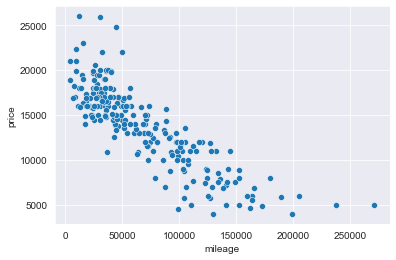

In [4]:
honda_df = cars_df[cars_df["make"] == "Honda"]
sns.scatterplot(data=honda_df, x="mileage", y="price")

The relationship is reasonably approximated by a linear function. However, a linear function will definitely under estimate the price for Hondas at the upper and lower mileage ranges, indicating that a nonlinear function may fit the data more accurately.  

**Part (b)** Test your rationale from part (a) by fitting a quadratic model predicting price from mileage. Print the model summary, and show the scatterplot from part (a) with your regression curve added.

In [11]:
quad_model = smf.ols("price ~ mileage + I(mileage ** 2)", data=accord_df).fit()
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     190.7
Date:                Tue, 09 May 2023   Prob (F-statistic):           7.73e-38
Time:                        12:51:49   Log-Likelihood:                -1118.2
No. Observations:                 122   AIC:                             2242.
Df Residuals:                     119   BIC:                             2251.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.207e+04    603.899     36.548      0.000    2.09e+04    2.33e+04
mileage            -0.1311      0.015     -8.691      0.000      -0.161      -0.101
I(mileage ** 2)  2.324e-07   7.72e-08      3.009      0.003    7.95e-08    3.85e-07
==============================================================================
Omnibus:                       10.208   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               23.891
Skew:                           0.130   Prob(JB):                     6.49e-06
Kurtosis:                       5.152   Cond. No.                     3.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='mileage', ylabel='price'>

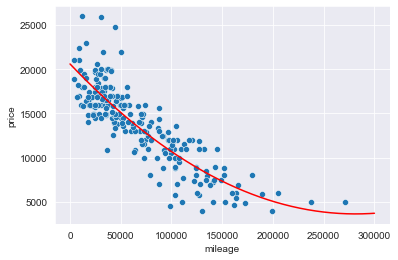

In [128]:
x = np.linspace(0, 300000, 10000)
inputs = np.column_stack([np.ones(10000), x, x**2])

sns.scatterplot(data=honda_df, x="mileage", y="price")
sns.lineplot(x=x, y=quad_model.predict(inputs), color="red")

The quadratic model does seem to fit the data better visually. The coefficient for the quadratic term is also significant with near 0 p-value, indicating value for the quadratic model.

**Part (c)**: Is the quadratic model a better model than the linear model with only mileage (i.e. the model from Q1b)? Justify your answer with appropriate model outputs.

In [12]:
linear_model = smf.ols("price ~ mileage", data=accord_df).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 09 May 2023   Prob (F-statistic):           2.58e-37
Time:                        12:56:57   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.068e+04    399.474     51.757      0.000    1.99e+04    2.15e+04
mileage       -0.0878      0.005    -18.678      0.000      -0.097      -0.079
==============================================================================
Omnibus:                       11.055   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               25.418
Skew:                           0.215   Prob(JB):                     3.02e-06
Kurtosis:                       5.194   Cond. No.                     1.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are a few different metrics that could be used to determine which model is better. The simpliest is to use R squared: the quadratic model has an R squared of 0.762, while the linear model has an R squared of 0.744. Since the quadratic model has a larger R squared, this signals that the quadratic model is a better fit.

You could also calculate the root mean squared error (RMSE) for each model, and determine the better model as the model with the lower RMSE. This should be roughly equivalent to the R squared approach.